In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import json
import csv
import tweepy
import re

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 84.0 MB/s 
     |████████████████████████████████| 101 kB 14.4 MB/s 
     |████████████████████████████████| 6.6 MB 74.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as plt

import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.patches as mpatches
%matplotlib inline

import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


#PyTorch LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

#Transformers library for BERT
import transformers
from transformers import BertModel
from transformers import BertTokenizer
from transformers import AdamW, get_linear_schedule_with_warmup

from sklearn.metrics import classification_report, plot_confusion_matrix

#Seed for reproducibility
import random

seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)

import time

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 432x288 with 0 Axes>

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/StrangerThings.csv')
df.head()

,timestamp,tweet_text,username,all_hastags,followers_count
0,2022-08-14 03:35:55+00:00,b'Steve Kitty#steveharrington #kitty #stevekit...,b'Anajuliaaee',"['steveharrington', 'kitty', 'stevekitty', 'St...",1
1,2022-08-14 03:31:40+00:00,b'After binge watching #StrangerThings this we...,b'mariadealNP',"['StrangerThings', 'VictorCreelHouse']",55
2,2022-08-14 03:29:06+00:00,b'- \xf0\x9d\x98\x8a\xf0\x9d\x98\xa2\xf0\x9d\x...,b'Per_cyhale',"['StrangerThings', 'OC']",10
3,2022-08-14 03:27:43+00:00,b'Love these two so much \xf0\x9f\xab\xb6\xf0\...,b'ShavaunChaytor',"['Joekeey', 'JosephQuinn', 'steveharrington', ...",528
4,2022-08-14 03:27:13+00:00,b'HER VOICE #mayahawke #Singing #mayahawke #St...,b'Hearts4Robin_',"['mayahawke', 'Singing', 'mayahawke', 'Strange...",1


In [ ]:
df.shape

(2670, 5)

In [ ]:
df.isnull().sum()

timestamp          0
tweet_text         0
username           0
all_hastags        0
followers_count    0
dtype: int64

In [ ]:
#decoding bytes format to string
import ast
df['tweet_text'] = df['tweet_text'].apply(ast.literal_eval).str.decode("utf-8")
df['username'] = df['username'].apply(ast.literal_eval).str.decode("utf-8")


In [ ]:
tweets = df[['tweet_text']]
tweets.head()

,tweet_text
0,Steve Kitty#steveharrington #kitty #stevekitty...
1,After binge watching #StrangerThings this week...
2,- 𝘊𝘢𝘳𝘷𝘦𝘳 𝘓𝘶𝘯𝘵𝘻- 𝟣𝟧- “𝘗𝘴𝘺𝘤𝘩𝘰”- 𝘴𝘬𝘢𝘵𝘦𝘣𝘰𝘳𝘥𝘦𝘳- 𝘮𝘢𝘥...
3,Love these two so much 🫶🏻🤍 #Joekeey #JosephQui...
4,HER VOICE #mayahawke #Singing #mayahawke #Stra...


In [ ]:
# NLP libraries
import regex
import nltk
from bs4 import BeautifulSoup
import unicodedata
pd.options.mode.chained_assignment = None  # default='warn'

# clean the tweet text
def clean_tweet_text(text):
    
    #Removes HTML-Tags from a string, if present
    text = BeautifulSoup(text, 'html.parser').get_text()
    
    #Clean string without URL addresses
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    #Removes all accented characters from a string, if present
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    #Removes all punctuation from a string, if present
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    
    #Clean string without irrelevant characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    #Removes extra whitespaces from a string, if present
    text = re.sub(r'^\s*|\s\s*', ' ', text).strip()
    
    #to remove @mentions
    text = regex.sub(r"[^a-zA-Z0-9\s]", "", text)
          
    #to remove html tags
    text = regex.sub(r"<[^<]+?>", "", text)
    
    
    return text

tweets['tweet_text'] = tweets['tweet_text'].apply(clean_tweet_text)
tweets.head()

,tweet_text
0,Steve Kitty steveharrington kitty stevekitty S...
1,After binge watching StrangerThings this week ...
2,Carver Luntz Psycho skateborder mad max enthus...
3,Love these two so much Joekeey JosephQuinn ste...
4,HER VOICE mayahawke Singing mayahawke Stranger...


In [ ]:
#lower the text
tweets['tweet_text'] = tweets['tweet_text'].str.lower()
tweets.head()

,tweet_text
0,steve kitty steveharrington kitty stevekitty s...
1,after binge watching strangerthings this week ...
2,carver luntz psycho skateborder mad max enthus...
3,love these two so much joekeey josephquinn ste...
4,her voice mayahawke singing mayahawke stranger...


In [ ]:
#word count

def word_count_func(text):
    
    return len(text.split())


tweets['Word_Count'] = tweets['tweet_text'].apply(word_count_func)

tweets.head()

,tweet_text,Word_Count
0,steve kitty steveharrington kitty stevekitty s...,6
1,after binge watching strangerthings this week ...,17
2,carver luntz psycho skateborder mad max enthus...,11
3,love these two so much joekeey josephquinn ste...,10
4,her voice mayahawke singing mayahawke stranger...,9


In [ ]:
pip install matplotlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.3 MB/s 
     |████████████████████████████████| 947 kB 63.1 MB/s 


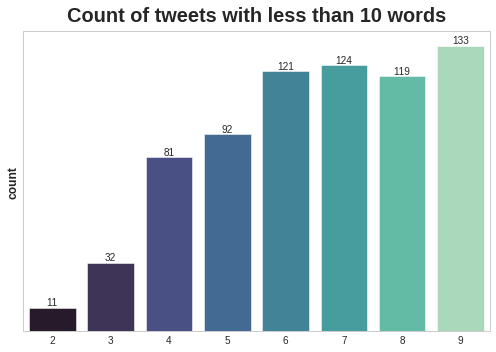

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='Word_Count', data=tweets[tweets['Word_Count']<10], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
tweets = tweets[tweets['Word_Count']> 3]
tweets.sort_values(by=['Word_Count'], ascending=False)

,tweet_text,Word_Count
1299,wait am i the only one who actually liked henr...,57
2005,rottingsteddie ronancebot that was strange may...,57
536,danin d i think you re right will s story feel...,56
245,brilliant discussion with an under yr old who ...,56
570,augmenteddg i don t care how much the fandom f...,56
...,...,...
547,jopperlumax happiest memory strangerthings,4
1828,leave will alonee strangerthings,4
255,the piggyback strangerthings strangerthings,4
256,the piggyback strangerthings strangerthings,4


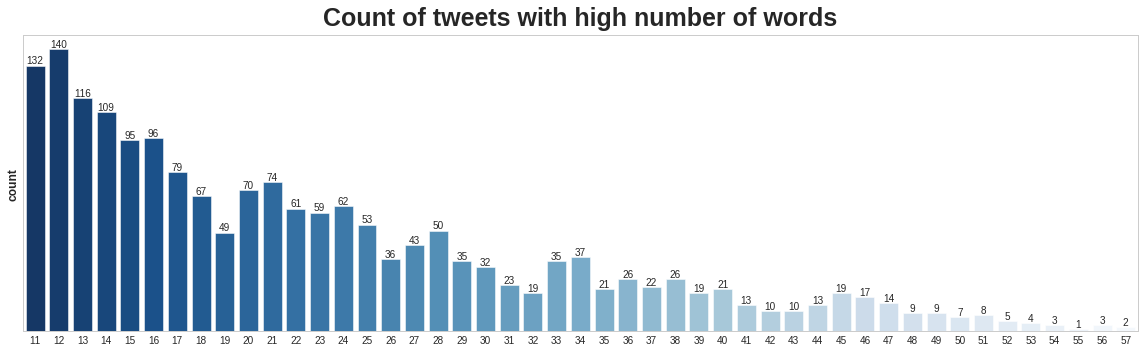

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='Word_Count', data=tweets[(tweets['Word_Count']<=1000) & (tweets['Word_Count']>10)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
tweets = tweets[tweets['Word_Count'] < 100]

In [ ]:
max_len = np.max(tweets['Word_Count'])
max_len

57

In [ ]:
tweets.sort_values(by=["Word_Count"], ascending=False)

,tweet_text,Word_Count
1299,wait am i the only one who actually liked henr...,57
2005,rottingsteddie ronancebot that was strange may...,57
536,danin d i think you re right will s story feel...,56
245,brilliant discussion with an under yr old who ...,56
570,augmenteddg i don t care how much the fandom f...,56
...,...,...
547,jopperlumax happiest memory strangerthings,4
1828,leave will alonee strangerthings,4
255,the piggyback strangerthings strangerthings,4
256,the piggyback strangerthings strangerthings,4


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud


#create a function to get subjectivity
def getSub(text):
    return TextBlob(text).sentiment.subjectivity

#function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create new two columns
tweets['Subjectivity'] = tweets['tweet_text'].apply(getSub)
tweets['Polarity'] = tweets['tweet_text'].apply(getPolarity)


tweets

,tweet_text,Word_Count,Subjectivity,Polarity
0,steve kitty steveharrington kitty stevekitty s...,6,0.000000,0.000000
1,after binge watching strangerthings this week ...,17,0.651852,0.342593
2,carver luntz psycho skateborder mad max enthus...,11,1.000000,-0.625000
3,love these two so much joekeey josephquinn ste...,10,0.400000,0.350000
4,her voice mayahawke singing mayahawke stranger...,9,1.000000,0.250000
...,...,...,...,...
2665,call of duty black ops s creator horror game p...,39,0.300000,-0.188889
2666,the journey hasnt been easy milliebobbybrown t...,12,0.833333,0.433333
2667,i ve just watched episode s e of stranger thin...,12,0.000000,0.000000
2668,first person i thought netflixfr strangerthing...,7,0.333333,0.250000


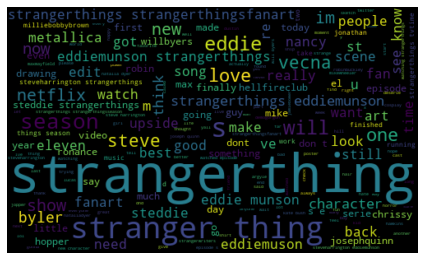

In [ ]:
#plotting the wordcloud
words = ' '.join( [tweet for tweet in tweets['tweet_text']])

wordcloud = WordCloud(width=500, height = 300, random_state=21, max_font_size=119).generate(words)


plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Create a function to calculate positive, neutral and negative analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
tweets['Analysis'] = tweets['Polarity'].apply(getAnalysis)

tweets.head()

,tweet_text,Word_Count,Subjectivity,Polarity,Analysis
0,steve kitty steveharrington kitty stevekitty s...,6,0.000000,0.000000,Neutral
1,after binge watching strangerthings this week ...,17,0.651852,0.342593,Positive
2,carver luntz psycho skateborder mad max enthus...,11,1.000000,-0.625000,Negative
3,love these two so much joekeey josephquinn ste...,10,0.400000,0.350000,Positive
4,her voice mayahawke singing mayahawke stranger...,9,1.000000,0.250000,Positive


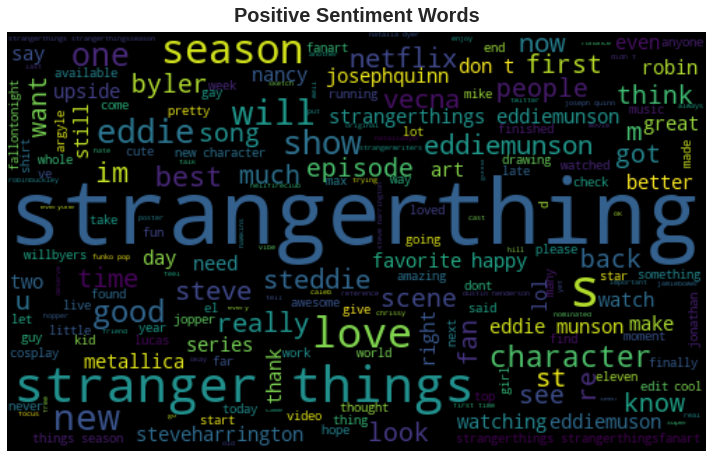

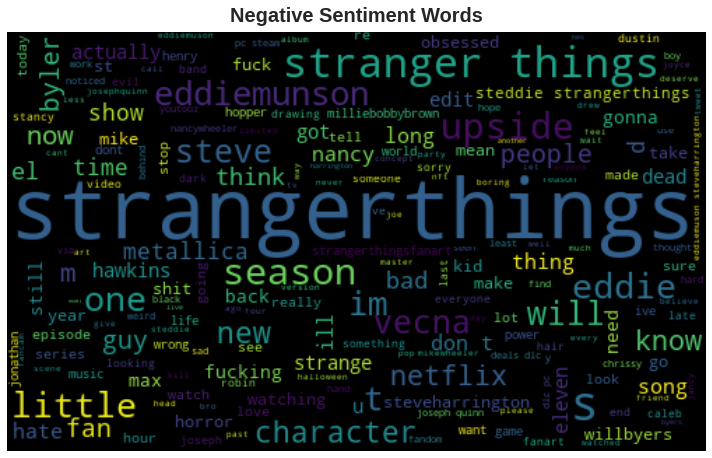

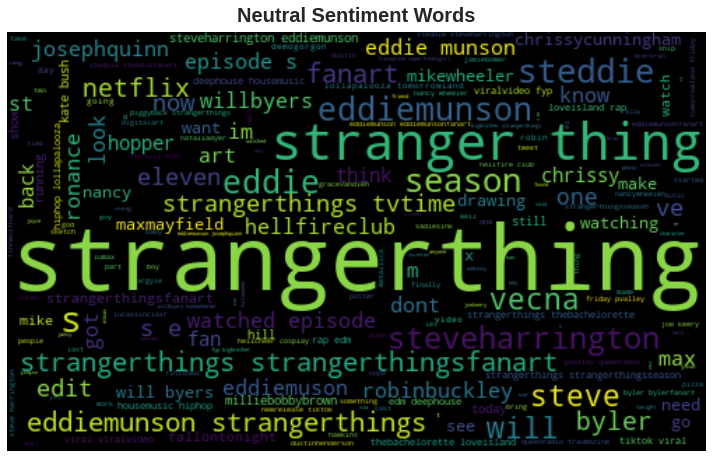

In [ ]:
#### Visualizing data into wordclouds


from wordcloud import WordCloud, STOPWORDS

def wordCount(tweets, Analysis):
   
    # Combining all tweets
    words1 = ' '.join( [tweet for tweet in tweets[tweets.Analysis==Analysis]['tweet_text']])
                              
    # Initialize wordcloud object
    wordcloud1 = WordCloud(width=500, height = 300, random_state=21, max_font_size=119,stopwords = STOPWORDS).generate(words1)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud1.generate(words1), interpolation = 'bilinear')
    plt.title('{} Sentiment Words'.format(Analysis), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordCount(tweets, 'Positive')
     
# Negative tweet words
wordCount(tweets, 'Negative')
     
# Neutral tweet words
wordCount(tweets, 'Neutral')

In [ ]:
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 5.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
import plotly.express as px
fig = px.pie(tweets, names='Analysis', title ='Sentiment Analysis')
fig.show()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
#percentage of the positive tweets
pos_tweets = tweets[tweets.Analysis =='Positive']
pos_tweets = pos_tweets['tweet_text']

round((pos_tweets.shape[0] / tweets.shape[0]) * 100, 1)

41.8

In [ ]:
#percentage of the negative tweets
neg_tweets = tweets[tweets.Analysis =='Negative']
neg_tweets = neg_tweets['tweet_text']

round((neg_tweets.shape[0] / tweets.shape[0]) * 100, 1)

15.3

In [ ]:
#percentage of the neutral tweets
neu_tweets = tweets[tweets.Analysis =='Neutral']
neu_tweets = neu_tweets['tweet_text']

round((neu_tweets.shape[0] / tweets.shape[0]) * 100, 1)

42.8

In [ ]:
# value counts
count = tweets['Analysis'].value_counts()
count

Neutral     1125
Positive    1099
Negative     403
Name: Analysis, dtype: int64

In [ ]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # tokenize
    words = tweet.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    words = ' '.join(words)
    # return list
    return words

tweets['tweet_text'] = tweets['tweet_text'].apply(tweet_to_words)
tweets.head()

,tweet_text,Word_Count,Subjectivity,Polarity,Analysis
0,steve kitty steveharrington kitty stevekitty s...,6,0.000000,0.000000,Neutral
1,binge watching strangerthings week drove see b...,17,0.651852,0.342593,Positive
2,carver luntz psycho skateborder mad max enthus...,11,1.000000,-0.625000,Negative
3,love two much joekeey josephquinn steveharring...,10,0.400000,0.350000,Positive
4,voice mayahawke singing mayahawke strangerthin...,9,1.000000,0.250000,Positive


In [ ]:
import nltk
nltk.download('punkt')
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

tweets['tweet_text'] = tweets['tweet_text'].apply(stemmer)
tweets.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,tweet_text,Word_Count,Subjectivity,Polarity,Analysis
0,steve kitti steveharrington kitti stevekitti s...,6,0.000000,0.000000,Neutral
1,bing watch strangerth week drove see beauti su...,17,0.651852,0.342593,Positive
2,carver luntz psycho skatebord mad max enthusia...,11,1.000000,-0.625000,Negative
3,love two much joekeey josephquinn steveharring...,10,0.400000,0.350000,Positive
4,voic mayahawk sing mayahawk strangerth pretti ...,9,1.000000,0.250000,Positive


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label = LabelEncoder()
Y = label.fit_transform(tweets['Analysis'])

Y

array([1, 2, 0, ..., 1, 2, 1])

In [ ]:
X = tweets['tweet_text']

In [ ]:
tweets['Analysis'] = label.fit_transform(tweets['Analysis'])
tweets.head()

,tweet_text,Word_Count,Subjectivity,Polarity,Analysis
0,steve kitti steveharrington kitti stevekitti s...,6,0.000000,0.000000,1
1,bing watch strangerth week drove see beauti su...,17,0.651852,0.342593,2
2,carver luntz psycho skatebord mad max enthusia...,11,1.000000,-0.625000,0
3,love two much joekeey josephquinn steveharring...,10,0.400000,0.350000,2
4,voic mayahawk sing mayahawk strangerth pretti ...,9,1.000000,0.250000,2


In [ ]:
print(X.shape)
print(Y.shape)

(2627,)
(2627,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=24)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=24)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[  0, 290],
       [  1, 809],
       [  2, 791]])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in X_train], y_train)), columns = ['tweet_text', 'Analysis']);

In [ ]:
X_train = train_os['tweet_text'].values
y_train = train_os['Analysis'].values

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[  0, 809],
       [  1, 809],
       [  2, 809]])

## Naive Bayes baseline model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

voc_size = 10000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=voc_size,
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 


# Fit the training data
X_train_cv = count_vector.fit_transform(X_train)
# Transform testing data
X_test_cv = count_vector.transform(X_test)

In [ ]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

In [ ]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train)

MultinomialNB()

In [ ]:
sentiments = ['Positivie', 'Neutral','Negative']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
nb_pred = nb_clf.predict(X_test_tf)
print('Classification Report for Naive Bayes:\n',classification_report(y_test, nb_pred, target_names=sentiments))

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

   Positivie       0.26      0.51      0.34        81
     Neutral       0.56      0.59      0.58       225
    Negative       0.50      0.30      0.37       220

    accuracy                           0.45       526
   macro avg       0.44      0.46      0.43       526
weighted avg       0.49      0.45      0.45       526



In [ ]:
confusion_matrix(y_test,nb_pred)


array([[ 41,  21,  19],
       [ 46, 133,  46],
       [ 73,  82,  65]])

## PyTorch Bi-LSTM RNN

In [ ]:
def Tokenize(column, seq_len):
    ##Create vocabulary of words from column
    corpus = [word for text in column for word in text.split()]
    count_words = Counter(corpus)
    sorted_words = count_words.most_common()
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

    ##Tokenize the columns text using the vocabulary
    text_int = []
    for text in column:
        r = [vocab_to_int[word] for word in text.split()]
        text_int.append(r)
    ##Add padding to tokens
    features = np.zeros((len(text_int), seq_len), dtype = int)
    for i, review in enumerate(text_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)

    return sorted_words, features

In [ ]:
vocabulary, tokenized_column = Tokenize(tweets["tweet_text"], max_len)

In [ ]:
tweets["tweet_text"].iloc[10]
tokenized_column[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2602,
        293,    1])

In [ ]:
keys = []
values = []
for key, value in vocabulary[:20]:
    keys.append(key)
    values.append(value)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



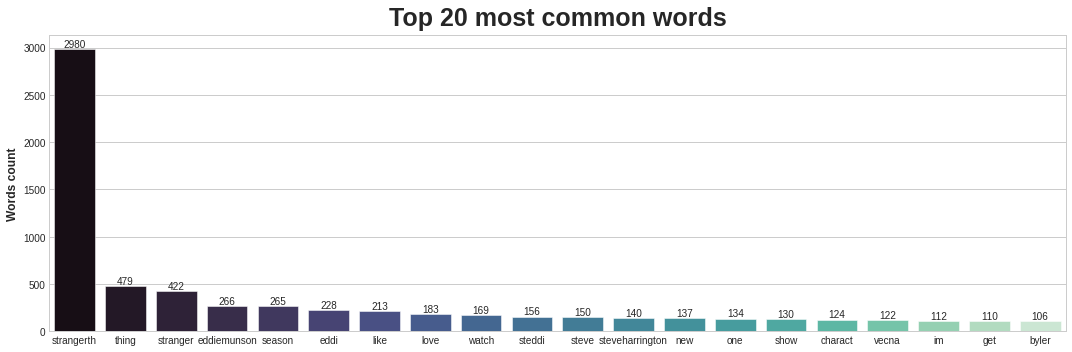

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(keys, values, palette='mako')
plt.title('Top 20 most common words', size=25)
ax.bar_label(ax.containers[0])
plt.ylabel("Words count")
plt.show()

## Word Embedding by Word2Vec

In [ ]:
Word2vec_train_data = list(map(lambda x: x.split(), X_train))
EMBEDDING_DIM = 200


In [ ]:
word2vec_model = Word2Vec(Word2vec_train_data, size=EMBEDDING_DIM)

In [ ]:
print(f"Vocabulary size: {len(vocabulary) + 1}")

Vocabulary size: 5993


In [ ]:
VOCAB_SIZE = len(vocabulary) + 1

In [ ]:
#define empty embedding matrix
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
    
#fill the embedding matrix with the pre trained values from word2vec
#    corresponding to word (string), token (number associated to the word)
for word, token in vocabulary:
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (5993, 200)


### Train - Validation - Test split

In [ ]:
X = tokenized_column
y = tweets['Analysis'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=24)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[  0, 290],
       [  1, 809],
       [  2, 791]])

In [ ]:
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(np.array(X_train),np.array(y_train));

In [ ]:
(unique, counts) = np.unique(y_train_os, return_counts=True)
np.asarray((unique, counts)).T

array([[  0, 809],
       [  1, 809],
       [  2, 809]])

In [ ]:
train_data = TensorDataset(torch.from_numpy(X_train_os), torch.from_numpy(y_train_os))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))

In [ ]:
BATCH_SIZE = 32

In [ ]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True) 
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=BATCH_SIZE, drop_last=True)

### PyTorch LSTM modeling

In [ ]:
NUM_CLASSES = 5 #We are dealing with a multiclass classification of 5 classes
HIDDEN_DIM = 100 #number of neurons of the internal state (internal neural network in the LSTM)
LSTM_LAYERS = 1 #Number of stacked LSTM layers

LR = 3e-4 #Learning rate
DROPOUT = 0.5 #LSTM Dropout
BIDIRECTIONAL = True #Boolean value to choose if to use a bidirectional LSTM or not
EPOCHS = 50 #Number of training epoch


In [ ]:
class BiLSTM_Sentiment_Classifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, lstm_layers, bidirectional,batch_size, dropout):
        super(BiLSTM_Sentiment_Classifier,self).__init__()
        
        self.lstm_layers = lstm_layers
        self.num_directions = 2 if bidirectional else 1
        self.hidden_dim = hidden_dim
        self.num_classes = num_classes
        self.batch_size = batch_size
        

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=lstm_layers,
                            dropout=dropout,
                            bidirectional=bidirectional,
                            batch_first=True)

        self.fc = nn.Linear(hidden_dim*self.num_directions, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x, hidden):
        self.batch_size = x.size(0)
        ##EMBEDDING LAYER
        embedded = self.embedding(x)
        #LSTM LAYERS
        out, hidden = self.lstm(embedded, hidden)
        #Extract only the hidden state from the last LSTM cell
        out = out[:,-1,:]
        #FULLY CONNECTED LAYERS
        out = self.fc(out)
        out = self.softmax(out)

        return out, hidden

    def init_hidden(self, batch_size):
        #Initialization of the LSTM hidden and cell states
        h0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach()
        c0 = torch.zeros((self.lstm_layers*self.num_directions, batch_size, self.hidden_dim)).detach()
        hidden = (h0, c0)
        return hidden

In [ ]:
model = BiLSTM_Sentiment_Classifier(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM,NUM_CLASSES, LSTM_LAYERS,BIDIRECTIONAL, BATCH_SIZE, DROPOUT)


#Initialize embedding with the previously defined embedding matrix
model.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
#Allow the embedding matrix to be fined tuned to better adapt to out dataset and get higher accuracy
model.embedding.weight.requires_grad=True

print(model)

BiLSTM_Sentiment_Classifier(
  (embedding): Embedding(5993, 200)
  (lstm): LSTM(200, 100, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=200, out_features=5, bias=True)
  (softmax): LogSoftmax(dim=1)
)


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1



In [ ]:
criterion = nn.NLLLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay = 5e-6)

### LSTM Training loop

In [ ]:
total_step = len(train_loader)
total_step_val = len(valid_loader)

early_stopping_patience = 4
early_stopping_counter = 0

valid_acc_max = 0 # Initialize best accuracy top 0

for e in range(EPOCHS):

    #lists to host the train and validation losses of every batch for each epoch
    train_loss, valid_loss  = [], []
    #lists to host the train and validation accuracy of every batch for each epoch
    train_acc, valid_acc  = [], []

    #lists to host the train and validation predictions of every batch for each epoch
    y_train_list, y_val_list = [], []

    #initalize number of total and correctly classified texts during training and validation
    correct, correct_val = 0, 0
    total, total_val = 0, 0
    running_loss, running_loss_val = 0, 0


    ####TRAINING LOOP####

    model.train()

    for inputs, labels in train_loader:
      
        h = model.init_hidden(labels.size(0))

        model.zero_grad() #reset gradients 

        output, h = model(inputs,h) #get output and hidden states from LSTM network
        
        loss = criterion(output, labels)
        loss.backward()
        
        running_loss += loss.item()
        
        optimizer.step()

        y_pred_train = torch.argmax(output, dim=1) #get tensor of predicted values on the training set
        y_train_list.extend(y_pred_train.squeeze().tolist()) #transform tensor to list and the values to the list
        
        correct += torch.sum(y_pred_train==labels).item() #count correctly classified texts per batch
        total += labels.size(0) #count total texts per batch

    train_loss.append(running_loss / total_step)
    train_acc.append(100 * correct / total)

    ####VALIDATION LOOP####
    
    with torch.no_grad():
        
        model.eval()
        
        for inputs, labels in valid_loader:
            

            val_h = model.init_hidden(labels.size(0))

            output, val_h = model(inputs, val_h)

            val_loss = criterion(output, labels)
            running_loss_val += val_loss.item()

            y_pred_val = torch.argmax(output, dim=1)
            y_val_list.extend(y_pred_val.squeeze().tolist())

            correct_val += torch.sum(y_pred_val==labels).item()
            total_val += labels.size(0)

        valid_loss.append(running_loss_val / total_step_val)
        valid_acc.append(100 * correct_val / total_val)

    #Save model if validation accuracy increases
    if np.mean(valid_acc) >= valid_acc_max:
        torch.save(model.state_dict(), './state_dict.pt')
        print(f'Epoch {e+1}:Validation accuracy increased ({valid_acc_max:.6f} --> {np.mean(valid_acc):.6f}).  Saving model ...')
        valid_acc_max = np.mean(valid_acc)
        early_stopping_counter=0 #reset counter if validation accuracy increases
    else:
        print(f'Epoch {e+1}:Validation accuracy did not increase')
        early_stopping_counter+=1 #increase counter if validation accuracy does not increase
        
    if early_stopping_counter > early_stopping_patience:
        print('Early stopped at epoch :', e+1)
        break
    
    print(f'\tTrain_loss : {np.mean(train_loss):.4f} Val_loss : {np.mean(valid_loss):.4f}')
    print(f'\tTrain_acc : {np.mean(train_acc):.3f}% Val_acc : {np.mean(valid_acc):.3f}%')


Epoch 1:Validation accuracy increased (0.000000 --> 15.104167).  Saving model ...
	Train_loss : 1.3365 Val_loss : 1.1327
	Train_acc : 34.000% Val_acc : 15.104%
Epoch 2:Validation accuracy increased (15.104167 --> 51.562500).  Saving model ...
	Train_loss : 1.1041 Val_loss : 1.0946
	Train_acc : 35.042% Val_acc : 51.562%
Epoch 3:Validation accuracy did not increase
	Train_loss : 1.0889 Val_loss : 1.0963
	Train_acc : 42.333% Val_acc : 36.458%
Epoch 4:Validation accuracy increased (51.562500 --> 56.770833).  Saving model ...
	Train_loss : 1.0021 Val_loss : 0.9726
	Train_acc : 60.000% Val_acc : 56.771%
Epoch 5:Validation accuracy increased (56.770833 --> 64.583333).  Saving model ...
	Train_loss : 0.7002 Val_loss : 0.8799
	Train_acc : 78.458% Val_acc : 64.583%
Epoch 6:Validation accuracy increased (64.583333 --> 64.583333).  Saving model ...
	Train_loss : 0.4863 Val_loss : 0.8422
	Train_acc : 87.000% Val_acc : 64.583%
Epoch 7:Validation accuracy increased (64.583333 --> 67.708333).  Saving 

In [ ]:
# Loading the best model
model.load_state_dict(torch.load('./state_dict.pt'))

<All keys matched successfully>

## LSTM Testing


In [ ]:
model.eval()
y_pred_list = []
y_test_list = []
for inputs, labels in test_loader:
    
    test_h = model.init_hidden(labels.size(0))

    output, val_h = model(inputs, test_h)
    y_pred_test = torch.argmax(output, dim=1)
    y_pred_list.extend(y_pred_test.squeeze().tolist())
    y_test_list.extend(labels.squeeze().tolist())

In [ ]:
print('Classification Report for Bi-LSTM :\n', classification_report(y_test_list, y_pred_list, target_names=sentiments))

Classification Report for Bi-LSTM :
               precision    recall  f1-score   support

   Positivie       0.61      0.38      0.47        79
     Neutral       0.70      0.78      0.74       218
    Negative       0.76      0.77      0.77       215

    accuracy                           0.72       512
   macro avg       0.69      0.65      0.66       512
weighted avg       0.71      0.72      0.71       512



# BERT Classification

## Train - Validation - Test split

In [ ]:
X = tweets['tweet_text'].values
y = tweets['Analysis'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=24)

In [ ]:
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

In [ ]:
X_train_os = X_train_os.flatten()
y_train_os = y_train_os.flatten()

In [ ]:
(unique, counts) = np.unique(y_train_os, return_counts=True)
np.asarray((unique, counts)).T

array([[  0, 809],
       [  1, 809],
       [  2, 809]])

## BERT Tokenization

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
def bert_tokenizer(data):
    input_ids = []
    attention_masks = []
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]` special tokens
            max_length=MAX_LEN,             # Choose max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length 
            return_attention_mask=True      # Return attention mask
            )
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [ ]:
# Tokenize train tweets
encoded_tweets = [tokenizer.encode(sent, add_special_tokens=True) for sent in X_train]

# Find the longest tokenized tweet
max_len = max([len(sent) for sent in encoded_tweets])
print('Max length: ', max_len)

Max length:  69


In [ ]:
MAX_LEN = 70

In [ ]:
train_inputs, train_masks = bert_tokenizer(X_train_os)
val_inputs, val_masks = bert_tokenizer(X_valid)
test_inputs, test_masks = bert_tokenizer(X_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2329: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



### Data preprocessing for PyTorch BERT model

In [ ]:
# Convert target columns to pytorch tensors format
train_labels = torch.from_numpy(y_train_os)
val_labels = torch.from_numpy(y_valid)
test_labels = torch.from_numpy(y_test)

In [ ]:
batch_size = 32

In [ ]:
# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# BERT MODELING

In [ ]:
%%time
class Bert_Classifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(Bert_Classifier, self).__init__()
        # Specify hidden size of BERT, hidden size of the classifier, and number of labels
        n_input = 768
        n_hidden = 50
        n_output = 5
        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Add dense layers to perform the classification
        self.classifier = nn.Sequential(
            nn.Linear(n_input,  n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_output)
        )
        # Add possibility to freeze the BERT model
        # to avoid fine tuning BERT params (usually leads to worse results)
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        # Feed input data to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 28 µs, sys: 1 µs, total: 29 µs
Wall time: 33.1 µs


In [ ]:
def initialize_model(epochs=50):
    # Instantiate Bert Classifier
    bert_classifier = Bert_Classifier(freeze_bert=False)
    
    

    # Set up optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # learning rate, set to default value
                      eps=1e-8    # decay, set to default value
                      )
    
    ### Set up learning rate scheduler ###

    # Calculate total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Defint the scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
EPOCHS=50

In [ ]:
bert_classifier, optimizer, scheduler = initialize_model(epochs=EPOCHS)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning:

This implementation of AdamW is deprecated and will be removed in 

## BERT Training

In [ ]:
# Define Cross entropy Loss function for the multiclass classification task
loss_fn = nn.CrossEntropyLoss()

def bert_train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):

    print("Start training...\n")
    for epoch_i in range(epochs):
        print("-"*10)
        print("Epoch : {}".format(epoch_i+1))
        print("-"*10)
        print("-"*38)
        print(f"{'BATCH NO.':^7} | {'TRAIN LOSS':^12} | {'ELAPSED (s)':^9}")
        print("-"*38)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0
        
        ###TRAINING###

        # Put the model into the training mode
        model.train()

        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            
            b_input_ids, b_attn_mask, b_labels = tuple(t for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass and get logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update model parameters:
            # fine tune BERT params and train additional dense layers
            optimizer.step()
            # update learning rate
            scheduler.step()

            # Print the loss values and time elapsed for every 100 batches
            if (step % 100 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch
                
                print(f"{step:^9} | {batch_loss / batch_counts:^12.6f} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        ###EVALUATION###
        
        # Put the model into the evaluation mode
        model.eval()
        
        # Define empty lists to host accuracy and validation for each batch
        val_accuracy = []
        val_loss = []

        for batch in val_dataloader:
            batch_input_ids, batch_attention_mask, batch_labels = tuple(t for t in batch)
            
            # We do not want to update the params during the evaluation,
            # So we specify that we dont want to compute the gradients of the tensors
            # by calling the torch.no_grad() method
            with torch.no_grad():
                logits = model(batch_input_ids, batch_attention_mask)

            loss = loss_fn(logits, batch_labels)

            val_loss.append(loss.item())

            # Get the predictions starting from the logits (get index of highest logit)
            preds = torch.argmax(logits, dim=1).flatten()

            # Calculate the validation accuracy 
            accuracy = (preds == batch_labels).cpu().numpy().mean() * 100
            val_accuracy.append(accuracy)

        # Compute the average accuracy and loss over the validation set
        val_loss = np.mean(val_loss)
        val_accuracy = np.mean(val_accuracy)
        
        # Print performance over the entire training data
        time_elapsed = time.time() - t0_epoch
        print("-"*61)
        print(f"{'AVG TRAIN LOSS':^12} | {'VAL LOSS':^10} | {'VAL ACCURACY (%)':^9} | {'ELAPSED (s)':^9}")
        print("-"*61)
        print(f"{avg_train_loss:^14.6f} | {val_loss:^10.6f} | {val_accuracy:^17.2f} | {time_elapsed:^9.2f}")
        print("-"*61)
        print("\n")
    
    print("Training complete!")


In [ ]:
bert_train(bert_classifier, train_dataloader, val_dataloader, epochs=EPOCHS)

Start training...

----------
Epoch : 1
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   75     |   0.973531   |  732.47  
-------------------------------------------------------------
AVG TRAIN LOSS |  VAL LOSS  | VAL ACCURACY (%) | ELAPSED (s)
-------------------------------------------------------------
   0.973531    |  0.615212  |       78.55       |  753.18  
-------------------------------------------------------------


----------
Epoch : 2
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   75     |   0.490223   |  729.07  
-------------------------------------------------------------
AVG TRAIN LOSS |  VAL LOSS  | VAL ACCURACY (%) | ELAPSED (s)
-------------------------------------------------------------
   0.490223    |  0.638456  |       77.49       |  749.54  
-------------------------------------------------------

KeyboardInterrupt: ignored

## BERT Prediction

In [ ]:
def bert_predict(model, test_dataloader):
    
    # Define empty list to host the predictions
    preds_list = []
    
    # Put the model into evaluation mode
    model.eval()
    
    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask = tuple(t for t in batch)[:2]
        
        # Avoid gradient calculation of tensors by using "no_grad()" method
        with torch.no_grad():
            logit = model(batch_input_ids, batch_attention_mask)
        
        # Get index of highest logit
        pred = torch.argmax(logit,dim=1).cpu().numpy()
        # Append predicted class to list
        preds_list.extend(pred)

    return preds_list

In [ ]:
bert_preds = bert_predict(bert_classifier, test_dataloader)

In [ ]:
print('Classification Report for BERT :\n', classification_report(y_test, bert_preds, target_names=sentiments))

Classification Report for BERT :
               precision    recall  f1-score   support

   Positivie       0.68      0.52      0.59        81
     Neutral       0.89      0.83      0.86       225
    Negative       0.77      0.89      0.83       220

    accuracy                           0.81       526
   macro avg       0.78      0.75      0.76       526
weighted avg       0.81      0.81      0.80       526

